Code generation assisted by ChatGPT and Gemini

In [41]:
import pandas as pd

In [42]:
file_path = '/content/References_ManualCodes_MoreThan1_15Nov24 - References_ManualCodes_13Nov24.csv'
data = pd.read_csv(file_path)

In [43]:
#from chatGPT
import itertools
import networkx as nx
import matplotlib.pyplot as plt


In [44]:
data.head()

,Unnamed: 0,file,sentence,Environment,Freedom General,ICCPR/ICESCR 1.1,ICCPR 17.1,ICCPR 18.1,ICCPR 19.1,ICCPR 19.2,...,Justice,ICCPR 2.3,ICCPR 24.1,ICCPR 25,ICESCR 11.1,ICESCR 11.2,ICESCR 12.2,ICESCR 6.2,ICESCR 7,Security General
0,1.0,230203_Alliance_for_Universal_Digital_Rights,"Similarly, without regulation, the inevitable ...",1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2.0,230203_Alliance_for_Universal_Digital_Rights,States should take steps to minimize the energ...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,GDC-submission_ART-AI_University-of-Bath,The Roadmap for Digital Cooperation was publis...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,GDC-submission_ART-AI_University-of-Bath,Regulation of AI is increasingly relevant to f...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,GDC-submission_ART-AI_University-of-Bath,The Roadmap set out a vision for AI that is tr...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:

# Filter to only code columns (assuming codes have binary values of 0 or 1)
code_columns = data.columns[3:]  # skipping first 3 columns: Unnamed, file, sentence

# Initialize an empty dictionary to hold co-occurrence counts
cooccurrence_counts = pd.DataFrame(0, index=code_columns, columns=code_columns)

# Iterate over each row (sentence) and count co-occurrences
for _, row in data.iterrows():
    # Get the codes that co-occur in this sentence
    active_codes = row[code_columns][row[code_columns] == 1].index
    # Increment the count for each pair of active codes
    for code1, code2 in itertools.combinations(active_codes, 2):
        cooccurrence_counts.loc[code1, code2] += 1
        cooccurrence_counts.loc[code2, code1] += 1

# Build the network using NetworkX
G = nx.Graph()

# Add edges with weights to the graph based on co-occurrence counts
for code1 in cooccurrence_counts.columns:
    for code2 in cooccurrence_counts.columns:
        if cooccurrence_counts.loc[code1, code2] > 0:
            G.add_edge(code1, code2, weight=cooccurrence_counts.loc[code1, code2])


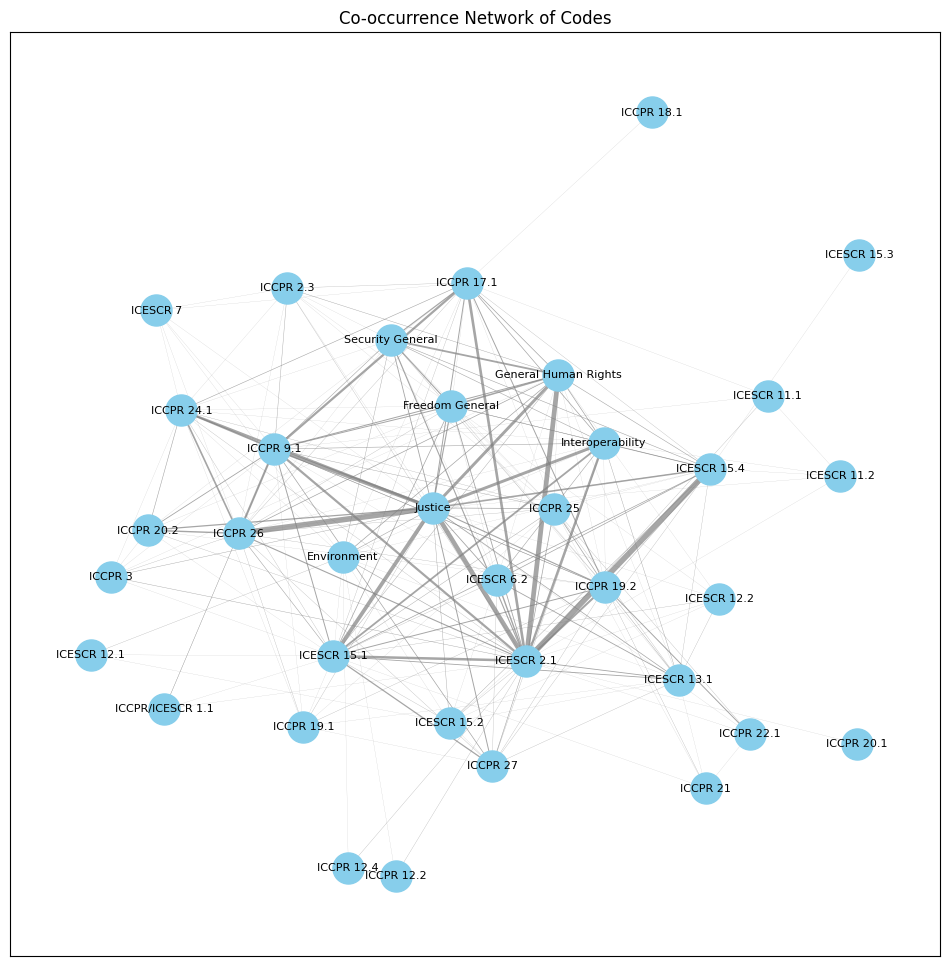

In [61]:
# Plot the co-occurrence network
plt.figure(figsize=(12, 12))
pos = nx.forceatlas2_layout(G, seed=42)  # Positioning nodes using a layout algorithm
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
# Draw edges with thickness based on weight
edges = nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.7, width=[G[u][v]['weight'] * 0.1 for u, v in G.edges])
plt.title("Co-occurrence Network of Codes")
plt.show()


In [47]:
!pip install python-louvain

In [48]:
from community import community_louvain

In [9]:
# Sample partition (community detection result) - replace this with your actual community detection output
partition = community_louvain.best_partition(G)  # Example partition dictionary from Louvain algorithm

In [10]:
#from ChatGPT
# Convert the partition to a DataFrame
nodes_communities_df = pd.DataFrame(list(partition.items()), columns=["Code", "Community"])

# Save to a CSV file
nodes_communities_df.to_csv("codes_with_communities_15Nov24.csv", index=False)

In [62]:
partition_df = pd.read_csv("/content/codes_with_communities_15Nov24.csv")

In [63]:
partition_df

,Code,Community
0,Environment,4
1,ICCPR 17.1,4
2,ICCPR 12.2,2
3,ICCPR 12.4,2
4,General Human Rights,4
5,ICESCR 12.1,4
6,ICESCR 13.1,1
7,ICESCR 15.1,1
8,ICESCR 15.2,1
9,ICESCR 15.4,1


In [64]:
# prompt: convert partition_df to a dictionary where Code is the key and Community is the value

partition = partition_df.set_index('Code')['Community'].to_dict()
partition

{'Environment': 4,
 'ICCPR 17.1': 4,
 'ICCPR 12.2': 2,
 'ICCPR 12.4': 2,
 'General Human Rights': 4,
 'ICESCR 12.1': 4,
 'ICESCR 13.1': 1,
 'ICESCR 15.1': 1,
 'ICESCR 15.2': 1,
 'ICESCR 15.4': 1,
 'ICESCR 2.1': 1,
 'Interoperability': 1,
 'Justice': 3,
 'ICCPR 24.1': 3,
 'ICESCR 7': 3,
 'Security General': 4,
 'Freedom General': 4,
 'ICCPR 19.2': 0,
 'ICCPR 20.2': 3,
 'ICCPR 26': 3,
 'ICCPR 9.1': 3,
 'ICCPR 2.3': 4,
 'ICCPR 25': 0,
 'ICESCR 12.2': 1,
 'ICESCR 6.2': 1,
 'ICCPR/ICESCR 1.1': 3,
 'ICCPR 18.1': 4,
 'ICESCR 11.1': 1,
 'ICCPR 19.1': 0,
 'ICCPR 27': 1,
 'ICCPR 21': 0,
 'ICCPR 22.1': 0,
 'ICESCR 15.3': 1,
 'ICCPR 3': 3,
 'ICCPR 20.1': 1,
 'ICESCR 11.2': 1}

In [65]:
# Manually define colors for each community (adjust colors as needed)
community_to_color = {
    0: "silver",
    1: "lightcoral",
    2: "mediumpurple",
    3: "skyblue",
    4: "darkkhaki",
}

# Map each node to its community color
node_colors = [community_to_color[partition[node]] for node in G.nodes()]

In [66]:
new_labels = {'ICESCR 15.3':'ICESCR 15.3 Scientific and Creative Freedom',
              'ICCPR 27' : 'ICCPR 27 Minority Cultural Rights',
              'ICESCR 15.1': 'ICESCR 15.1 Scientific and Cultural Benefit',
              'ICESCR 15.2': 'ICESCR 15.2 Scientific and Cultural Development',
              'ICCPR/ICESCR 1.1': 'ICCPR/ICESCR 1.1 Self-Determination',
              'ICESCR 13.1' : 'ICESCR 13.1 Education',
              'ICESCR 6.2' : 'ICESCR 6.2 Vocational Development',
              'ICCPR 17.1' : 'ICCPR 17.1 Privacy and Reputation',
              'ICCPR 18.1' : 'ICCPR 18.1 Religious Freedom',
              'ICCPR 19.1':'ICCPR 19.1 Freedom of Opinion',
              'ICCPR 20.1': 'ICCPR 20.1 Propaganda Prohibition',
              'ICCPR 19.2' : 'ICCPR 19.2 Freedom of Expression',
              'ICCPR 21' : 'ICCPR 21 Peaceful Assembly',
              'ICCPR 22.1' : 'ICCPR 22.1 Freedom of Association',
              'ICCPR 25': 'ICCPR 25 Suffrage and Political Participation',
              'ICCPR 2.3': 'ICCPR 2.3 Right to Remedy',
              'ICESCR 15.4': 'ICESCR 15.4 Scientific and Cultural Cooperation',
              'ICESCR 2.1' : 'ICESCR 2.1 International Assistance',
              'ICCPR 20.2' :'ICCPR 20.2 Discrimination Incitement Prohibition',
              'ICCPR 26': 'ICCPR 26 Protection Against Discrimination',
              'ICCPR 3' : 'ICCPR 3 Equal Rights of Men and Women',
              'ICCPR 24.1' : "ICCPR 24.1 Protection of Children",
              'ICCPR 9.1' :'ICCPR 9.1 Liberty and Security of Person',
              'ICESCR 7': 'ICESCR 7 Just and Favorable Working Conditions',
              'ICESCR 11.1': 'ICESCR 11.1 Adequate Standard of Living',
              'ICESCR 11.2': 'ICESCR 11.2 Freedom from Hunger',
              'ICCPR 12.2': 'ICCPR 12.2 Freedom to Leave Country',
              'ICCPR 12.4': 'ICCPR 12.4 Right to Enter Own Country',
              'ICESCR 12.1': 'ICESCR 12.1 Right to Health',
              'ICESCR 12.2': 'ICESCR 12.2 Medical Care and Hygiene'
              }

In [67]:
G=nx.relabel_nodes(G, new_labels)

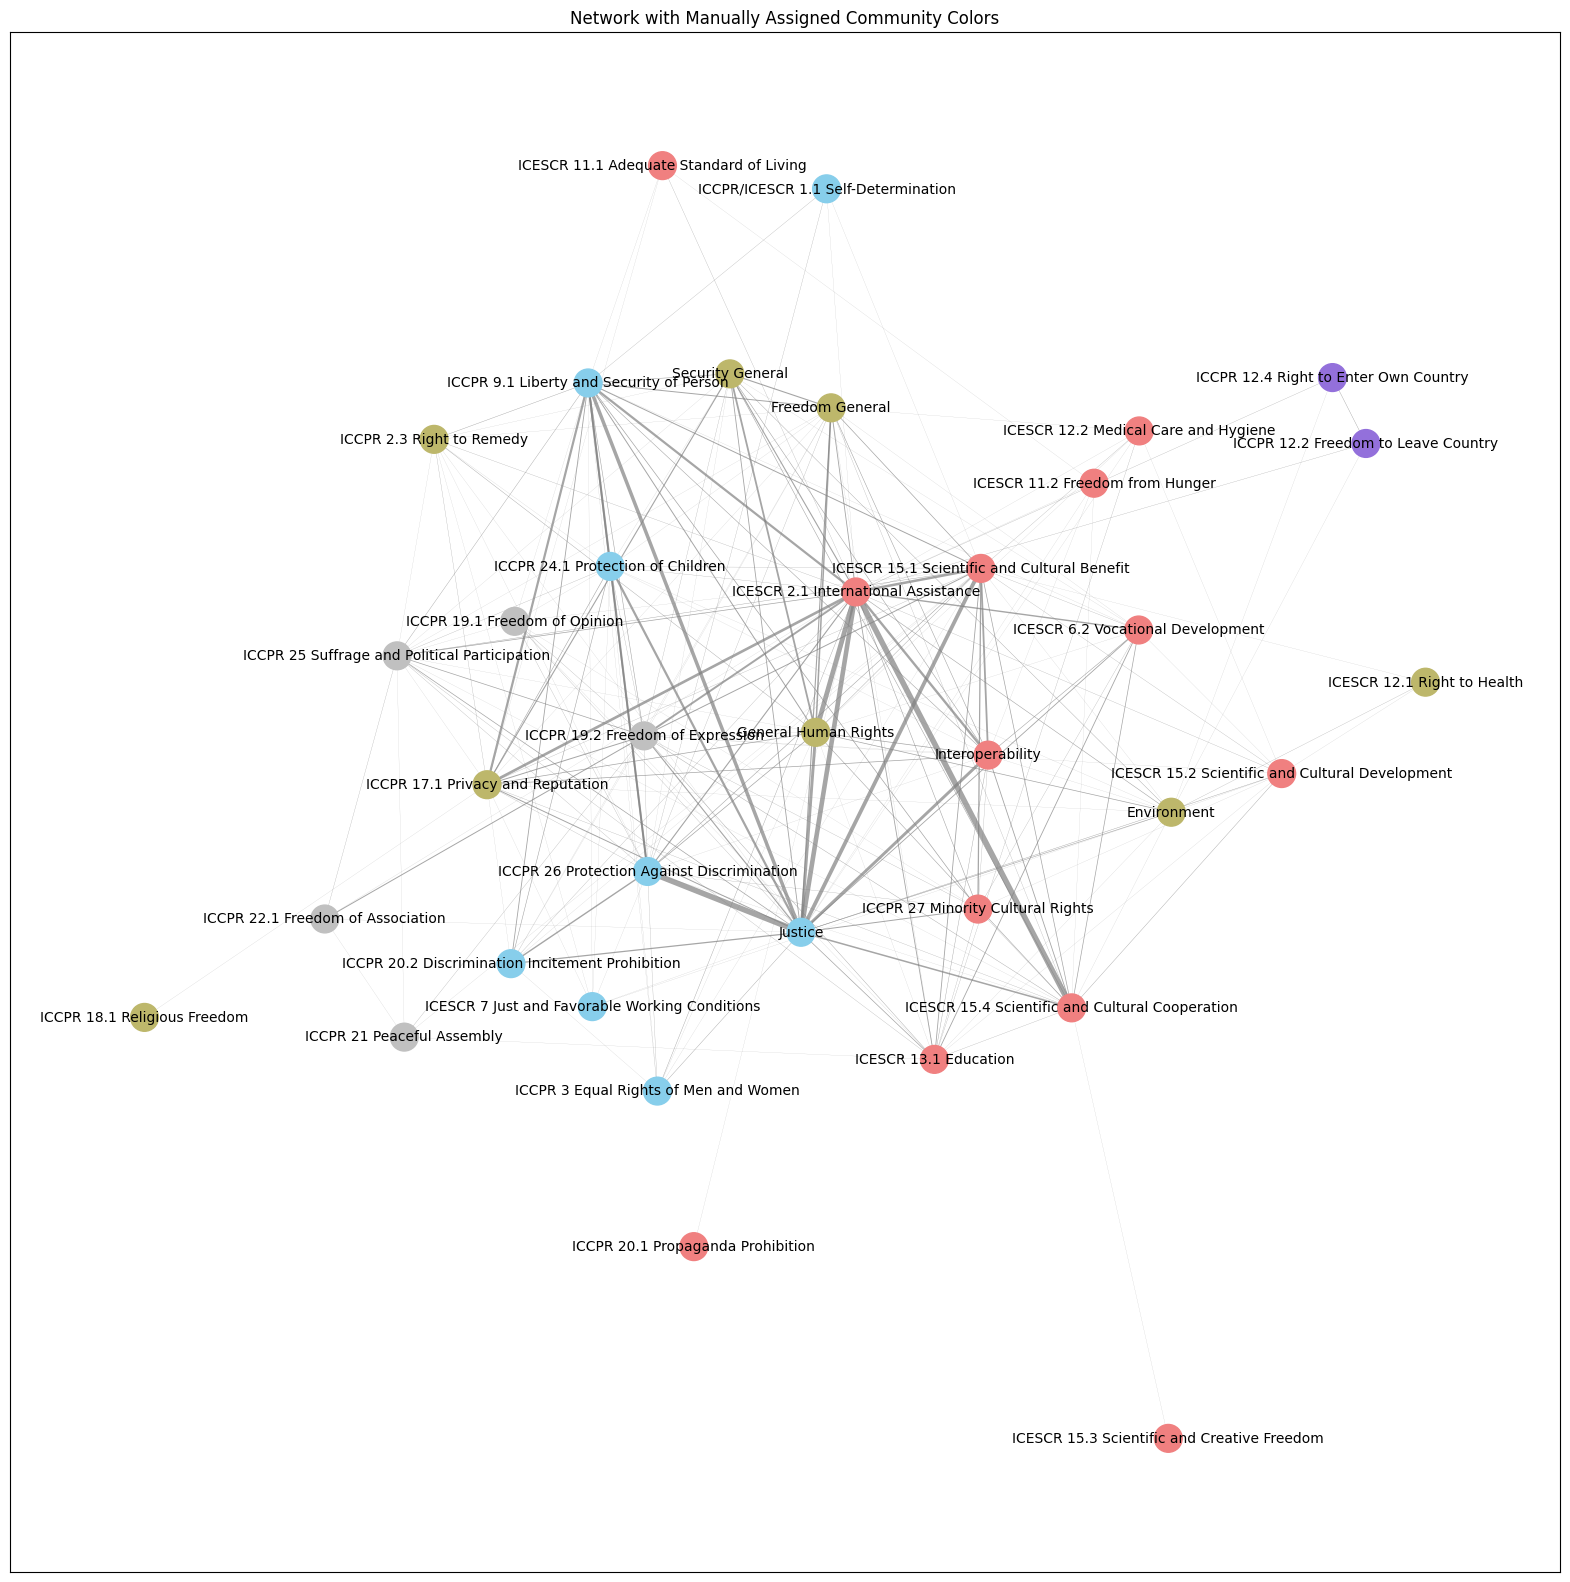

In [79]:
# Plot the network with manually assigned colors
plt.figure(figsize=(20, 20))
pos = nx.forceatlas2_layout(G, scaling_ratio = 4, gravity = 5)
nx.draw_networkx_nodes(G, pos, node_size=400, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
edges = nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.7, width=[G[u][v]['weight'] * 0.1 for u, v in G.edges])

plt.title("Network with Manually Assigned Community Colors")
plt.show()

In [ ]:
gexf_file_path = '/mnt/data/cooccurrence_network.gexf'
nx.write_gexf(G, gexf_file_path)

gexf_file_path

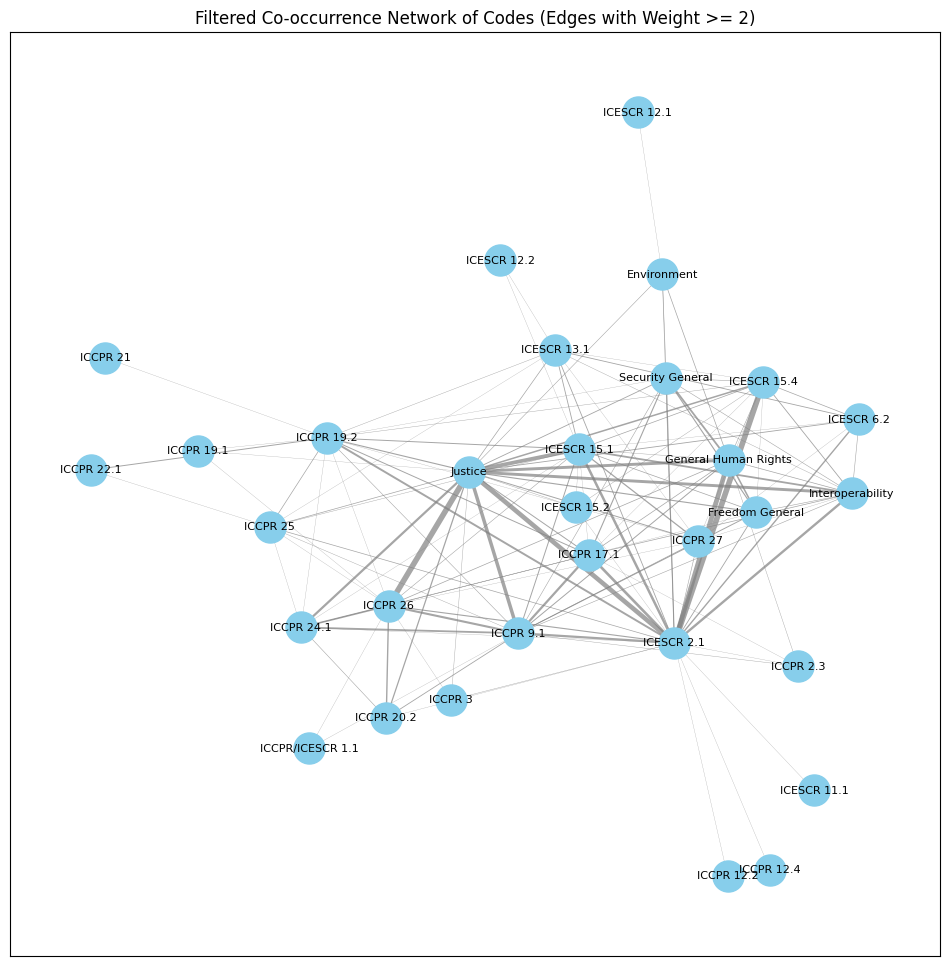

In [ ]:
# Remove edges with a weight less than 2
filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= 2]
filtered_G = G.edge_subgraph(filtered_edges).copy()

# Recompute positions for the filtered graph
pos_filtered = nx.forceatlas2_layout(filtered_G, seed=42)

# Plot the filtered co-occurrence network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(filtered_G, pos_filtered, node_size=500, node_color="skyblue")
nx.draw_networkx_labels(filtered_G, pos_filtered, font_size=8, font_family="sans-serif")
# Draw edges with thickness based on weight
edges = nx.draw_networkx_edges(filtered_G, pos_filtered, edge_color="gray", alpha=0.7, width=[filtered_G[u][v]['weight'] * 0.1 for u, v in filtered_G.edges])
plt.title("Filtered Co-occurrence Network of Codes (Edges with Weight >= 2)")
plt.show()


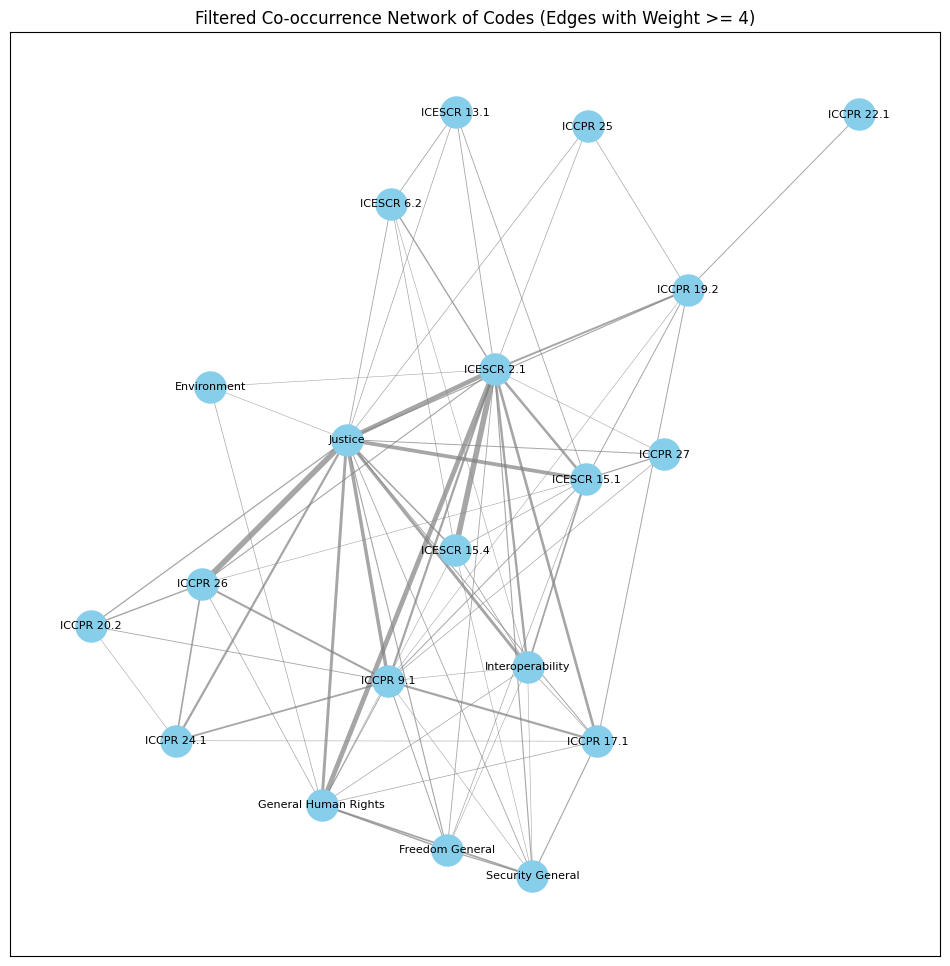

In [ ]:
# Remove edges with a weight less than 4
filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= 4]
filtered_G = G.edge_subgraph(filtered_edges).copy()

# Recompute positions for the filtered graph
pos_filtered = nx.forceatlas2_layout(filtered_G, seed=42)

# Plot the filtered co-occurrence network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(filtered_G, pos_filtered, node_size=500, node_color="skyblue")
nx.draw_networkx_labels(filtered_G, pos_filtered, font_size=8, font_family="sans-serif")
# Draw edges with thickness based on weight
edges = nx.draw_networkx_edges(filtered_G, pos_filtered, edge_color="gray", alpha=0.7, width=[filtered_G[u][v]['weight'] * 0.1 for u, v in filtered_G.edges])
plt.title("Filtered Co-occurrence Network of Codes (Edges with Weight >= 4)")
plt.show()
